In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 8)

from scipy import stats
import collections

import warnings
# warnings.filterwarnings('ignore')
from matplotlib.backends.backend_pdf import PdfPages

from pathlib import Path

import db_queries as db
import vivarium_helpers.id_helper as idh
import gbd_mapping
from vivarium import Artifact

# Add the repo directory vivarium_research_ciff_sam/ to sys.path
import os, sys
repo_path = os.path.abspath('../..')
sys.path.append(repo_path)
print("pwd:")
!pwd
print(f"{repo_path=}")

# Assumes vivarium_research_ciff_sam/ is in sys.path
# import model_validation.vivarium_transformed_output as vto
# import model_validation.vivarium_raw_output as vro
import model_validation.vivarium_output_processing as vp
import model_validation.ciff_sam_results as csr
import model_validation.ciff_sam_plots as csp

%load_ext autoreload
%autoreload 2

!whoami
!date

pwd:
/ihme/homes/ndbs/vivarium_research_ciff_sam/model_validation/model4
repo_path='/ihme/homes/ndbs/vivarium_research_ciff_sam'
ndbs
Fri Oct 29 12:22:11 PDT 2021


# Load data

In [2]:
results = csr.VivariumResults.cleaned_from_model_spec(4.1)
results.table_names()

['wasting_transition_count',
 'wasting_state_person_time',
 'deaths',
 'stunting_state_person_time',
 'population',
 'ylls',
 'ylds',
 'person_time',
 'cause_state_person_time',
 'cause_transition_count']

In [3]:
results.wasting_state_person_time

,sex,year,wasting_state,measure,input_draw,scenario,value,sq_lns,wasting_treatment,age
0,female,2022,mild_child_wasting,state_person_time,29,baseline,0.000000,covered,covered,early_neonatal
1,female,2022,mild_child_wasting,state_person_time,29,baseline,0.000000,covered,uncovered,early_neonatal
2,female,2022,mild_child_wasting,state_person_time,29,baseline,201.939767,uncovered,covered,early_neonatal
3,female,2022,mild_child_wasting,state_person_time,29,baseline,207.442847,uncovered,uncovered,early_neonatal
...,...,...,...,...,...,...,...,...,...,...
34556,male,2026,susceptible_to_child_wasting,state_person_time,946,wasting_treatment,0.000000,covered,covered,2_to_4
34557,male,2026,susceptible_to_child_wasting,state_person_time,946,wasting_treatment,0.000000,covered,uncovered,2_to_4
34558,male,2026,susceptible_to_child_wasting,state_person_time,946,wasting_treatment,198117.045859,uncovered,covered,2_to_4
34559,male,2026,susceptible_to_child_wasting,state_person_time,946,wasting_treatment,21226.153320,uncovered,uncovered,2_to_4


# Compute percent treated according to `wasting_treatment` column

In [4]:
percent_treated_by_age_year = csr.get_prevalence(
    results,
    'wasting_treatment',
    strata=['age', 'year'],
    multiplier=100
)
percent_treated_by_age_year

,age,year,input_draw,scenario,wasting_treatment,value,numerator_measure,denominator_measure,multiplier,measure
0,1-5_months,2022,29,baseline,covered,0.495020,state_person_time,state_person_time,1,prevalence
1,1-5_months,2022,29,baseline,uncovered,0.504980,state_person_time,state_person_time,1,prevalence
2,1-5_months,2022,29,sqlns,covered,0.495020,state_person_time,state_person_time,1,prevalence
3,1-5_months,2022,29,sqlns,uncovered,0.504980,state_person_time,state_person_time,1,prevalence
...,...,...,...,...,...,...,...,...,...,...
2156,late_neonatal,2026,946,sqlns,covered,0.899918,state_person_time,state_person_time,1,prevalence
2157,late_neonatal,2026,946,sqlns,uncovered,0.100082,state_person_time,state_person_time,1,prevalence
2158,late_neonatal,2026,946,wasting_treatment,covered,0.899918,state_person_time,state_person_time,1,prevalence
2159,late_neonatal,2026,946,wasting_treatment,uncovered,0.100082,state_person_time,state_person_time,1,prevalence


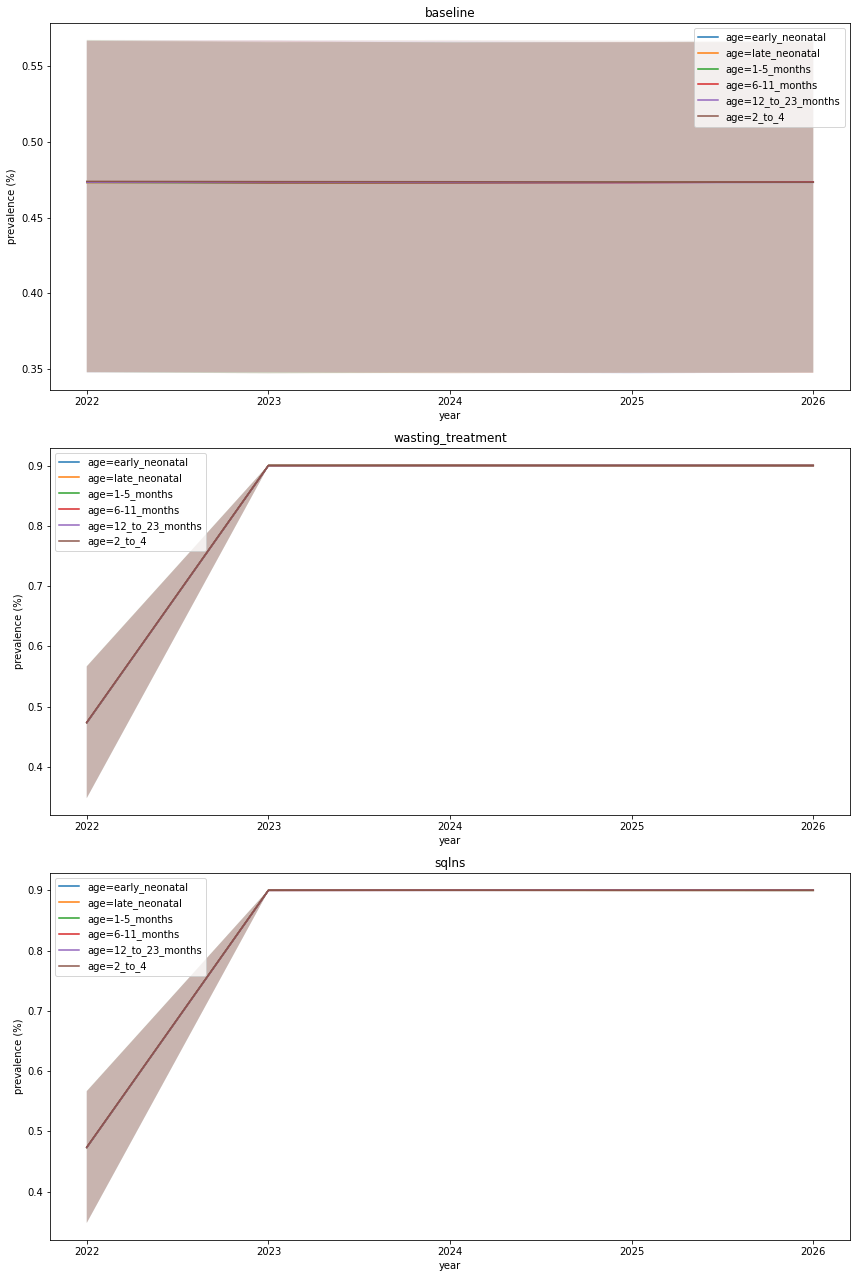

In [8]:
fig = csp.plot_over_time_by_column_for_each_scenario(
    percent_treated_by_age_year.query("wasting_treatment=='covered'"),
    colname='age',
    ylabel='prevalence (%)',
    suptitle='Percent treated by age group',
    uncertainty=True
)

In [14]:
vp.describe(
    percent_treated_by_age_year.query(
        "wasting_treatment=='covered' and scenario=='baseline' and year=='2022'")
)

,,,,,,,,count,mean,std,min,2.5%,50%,97.5%,max
age,denominator_measure,measure,multiplier,numerator_measure,scenario,wasting_treatment,year,,,,,,,,
1-5_months,state_person_time,prevalence,1,state_person_time,baseline,covered,2022,12.0,0.473166,0.066063,0.330075,0.347913,0.480318,0.566959,0.580065
12_to_23_months,state_person_time,prevalence,1,state_person_time,baseline,covered,2022,12.0,0.473223,0.065969,0.329285,0.347619,0.478553,0.566512,0.579284
2_to_4,state_person_time,prevalence,1,state_person_time,baseline,covered,2022,12.0,0.473808,0.066116,0.330099,0.348086,0.479346,0.566990,0.580106
6-11_months,state_person_time,prevalence,1,state_person_time,baseline,covered,2022,12.0,0.473467,0.065825,0.330543,0.348272,0.479992,0.566364,0.578813
early_neonatal,state_person_time,prevalence,1,state_person_time,baseline,covered,2022,12.0,0.473147,0.065902,0.330584,0.348332,0.480132,0.566293,0.579385
late_neonatal,state_person_time,prevalence,1,state_person_time,baseline,covered,2022,12.0,0.473030,0.065976,0.330526,0.348216,0.480037,0.566432,0.579552


In [13]:
vp.describe(
    percent_treated_by_age_year.query(
        "wasting_treatment=='covered' and scenario=='baseline' and year=='2024'")
)

,,,,,,,,count,mean,std,min,2.5%,50%,97.5%,max
age,denominator_measure,measure,multiplier,numerator_measure,scenario,wasting_treatment,year,,,,,,,,
1-5_months,state_person_time,prevalence,1,state_person_time,baseline,covered,2024,12.0,0.472950,0.065884,0.329294,0.347442,0.478627,0.565367,0.578518
12_to_23_months,state_person_time,prevalence,1,state_person_time,baseline,covered,2024,12.0,0.473084,0.066040,0.330176,0.347860,0.478814,0.566171,0.579188
2_to_4,state_person_time,prevalence,1,state_person_time,baseline,covered,2024,12.0,0.473580,0.066100,0.329659,0.347777,0.479550,0.566943,0.579897
6-11_months,state_person_time,prevalence,1,state_person_time,baseline,covered,2024,12.0,0.472945,0.065693,0.329343,0.347346,0.478460,0.565018,0.577867
early_neonatal,state_person_time,prevalence,1,state_person_time,baseline,covered,2024,12.0,0.473064,0.065729,0.329996,0.348149,0.479224,0.565660,0.579024
late_neonatal,state_person_time,prevalence,1,state_person_time,baseline,covered,2024,12.0,0.473000,0.065827,0.329553,0.347827,0.478848,0.565649,0.578981


In [15]:
vp.describe(
    percent_treated_by_age_year.query(
        "wasting_treatment=='covered' and scenario=='baseline' and year=='2026'")
)

,,,,,,,,count,mean,std,min,2.5%,50%,97.5%,max
age,denominator_measure,measure,multiplier,numerator_measure,scenario,wasting_treatment,year,,,,,,,,
1-5_months,state_person_time,prevalence,1,state_person_time,baseline,covered,2026,12.0,0.473542,0.065792,0.329797,0.347834,0.478591,0.565805,0.579174
12_to_23_months,state_person_time,prevalence,1,state_person_time,baseline,covered,2026,12.0,0.473162,0.065793,0.329571,0.347745,0.479110,0.565509,0.579039
2_to_4,state_person_time,prevalence,1,state_person_time,baseline,covered,2026,12.0,0.473233,0.065933,0.330014,0.347872,0.479308,0.566125,0.579081
6-11_months,state_person_time,prevalence,1,state_person_time,baseline,covered,2026,12.0,0.473503,0.065771,0.329466,0.347647,0.478866,0.565372,0.578371
early_neonatal,state_person_time,prevalence,1,state_person_time,baseline,covered,2026,12.0,0.473226,0.065824,0.330287,0.348130,0.478526,0.566191,0.579705
late_neonatal,state_person_time,prevalence,1,state_person_time,baseline,covered,2026,12.0,0.473308,0.065924,0.329788,0.347766,0.478616,0.566062,0.579556


In [16]:
.488*.731

0.356728

# Compute percent treated by wasting state

In [17]:
percent_treated_by_year_wasting_state = csr.get_prevalence(
    results,
    'wasting_treatment',
    strata=['year', 'wasting_state'],
    multiplier=100
)
percent_treated_by_year_wasting_state

,year,wasting_state,input_draw,scenario,wasting_treatment,value,numerator_measure,denominator_measure,multiplier,measure
0,2022,mild_child_wasting,29,baseline,covered,51.882094,state_person_time,state_person_time,100,prevalence
1,2022,mild_child_wasting,29,baseline,uncovered,48.117906,state_person_time,state_person_time,100,prevalence
2,2022,mild_child_wasting,29,sqlns,covered,51.882094,state_person_time,state_person_time,100,prevalence
3,2022,mild_child_wasting,29,sqlns,uncovered,48.117906,state_person_time,state_person_time,100,prevalence
...,...,...,...,...,...,...,...,...,...,...
1436,2026,susceptible_to_child_wasting,946,sqlns,covered,90.212954,state_person_time,state_person_time,100,prevalence
1437,2026,susceptible_to_child_wasting,946,sqlns,uncovered,9.787046,state_person_time,state_person_time,100,prevalence
1438,2026,susceptible_to_child_wasting,946,wasting_treatment,covered,90.212772,state_person_time,state_person_time,100,prevalence
1439,2026,susceptible_to_child_wasting,946,wasting_treatment,uncovered,9.787228,state_person_time,state_person_time,100,prevalence


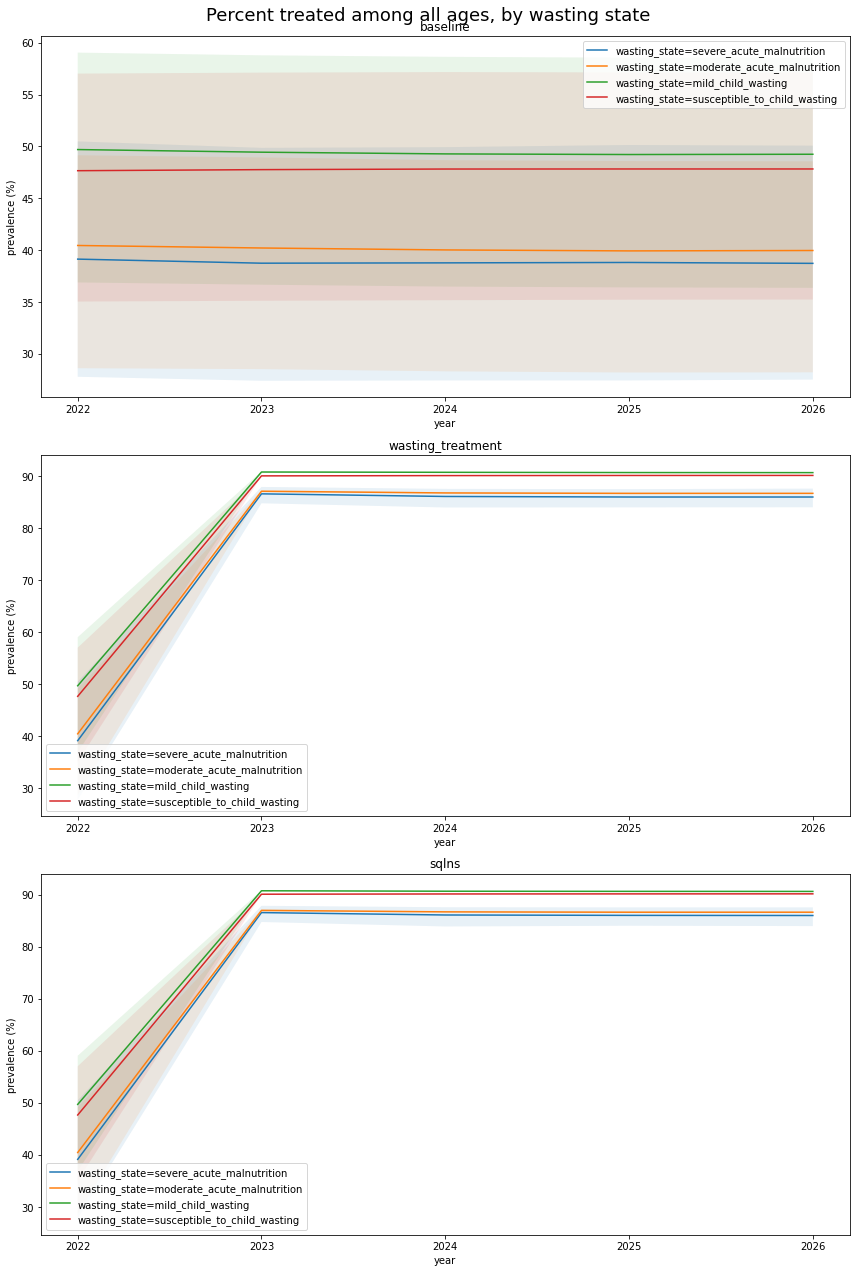

In [21]:
fig = csp.plot_over_time_by_column_for_each_scenario(
    percent_treated_by_year_wasting_state.query("wasting_treatment=='covered'"),
    colname='wasting_state',
    ylabel='prevalence (%)',
    suptitle='Percent treated among all ages, by wasting state',
    uncertainty=True
)

# Compute percent treated by age and wasting state

In [19]:
percent_treated_by_year_age_wasting_state = csr.get_prevalence(
    results,
    'wasting_treatment',
    strata=['year', 'age', 'wasting_state'],
    multiplier=100
)
percent_treated_by_year_age_wasting_state

,year,age,wasting_state,input_draw,scenario,wasting_treatment,value,numerator_measure,denominator_measure,multiplier,measure
0,2022,1-5_months,mild_child_wasting,29,baseline,covered,49.368219,state_person_time,state_person_time,100,prevalence
1,2022,1-5_months,mild_child_wasting,29,baseline,uncovered,50.631781,state_person_time,state_person_time,100,prevalence
2,2022,1-5_months,mild_child_wasting,29,sqlns,covered,49.368219,state_person_time,state_person_time,100,prevalence
3,2022,1-5_months,mild_child_wasting,29,sqlns,uncovered,50.631781,state_person_time,state_person_time,100,prevalence
...,...,...,...,...,...,...,...,...,...,...,...
8636,2026,late_neonatal,susceptible_to_child_wasting,946,sqlns,covered,90.075614,state_person_time,state_person_time,100,prevalence
8637,2026,late_neonatal,susceptible_to_child_wasting,946,sqlns,uncovered,9.924386,state_person_time,state_person_time,100,prevalence
8638,2026,late_neonatal,susceptible_to_child_wasting,946,wasting_treatment,covered,90.075614,state_person_time,state_person_time,100,prevalence
8639,2026,late_neonatal,susceptible_to_child_wasting,946,wasting_treatment,uncovered,9.924386,state_person_time,state_person_time,100,prevalence


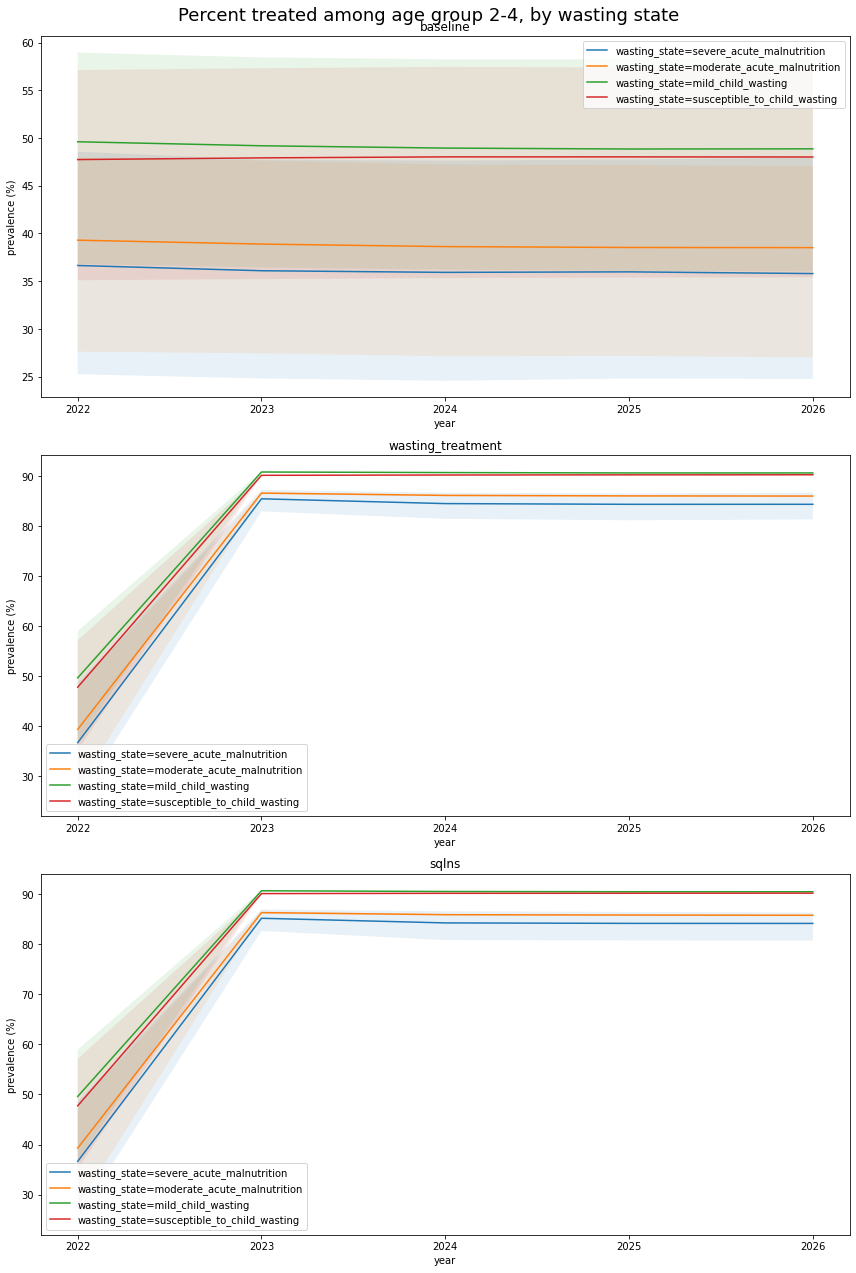

In [20]:
fig = csp.plot_over_time_by_column_for_each_scenario(
    percent_treated_by_year_age_wasting_state.query(
        "wasting_treatment=='covered' and age=='2_to_4'"),
    colname='wasting_state',
    ylabel='prevalence (%)',
    suptitle='Percent treated among age group 2-4, by wasting state',
    uncertainty=True
)

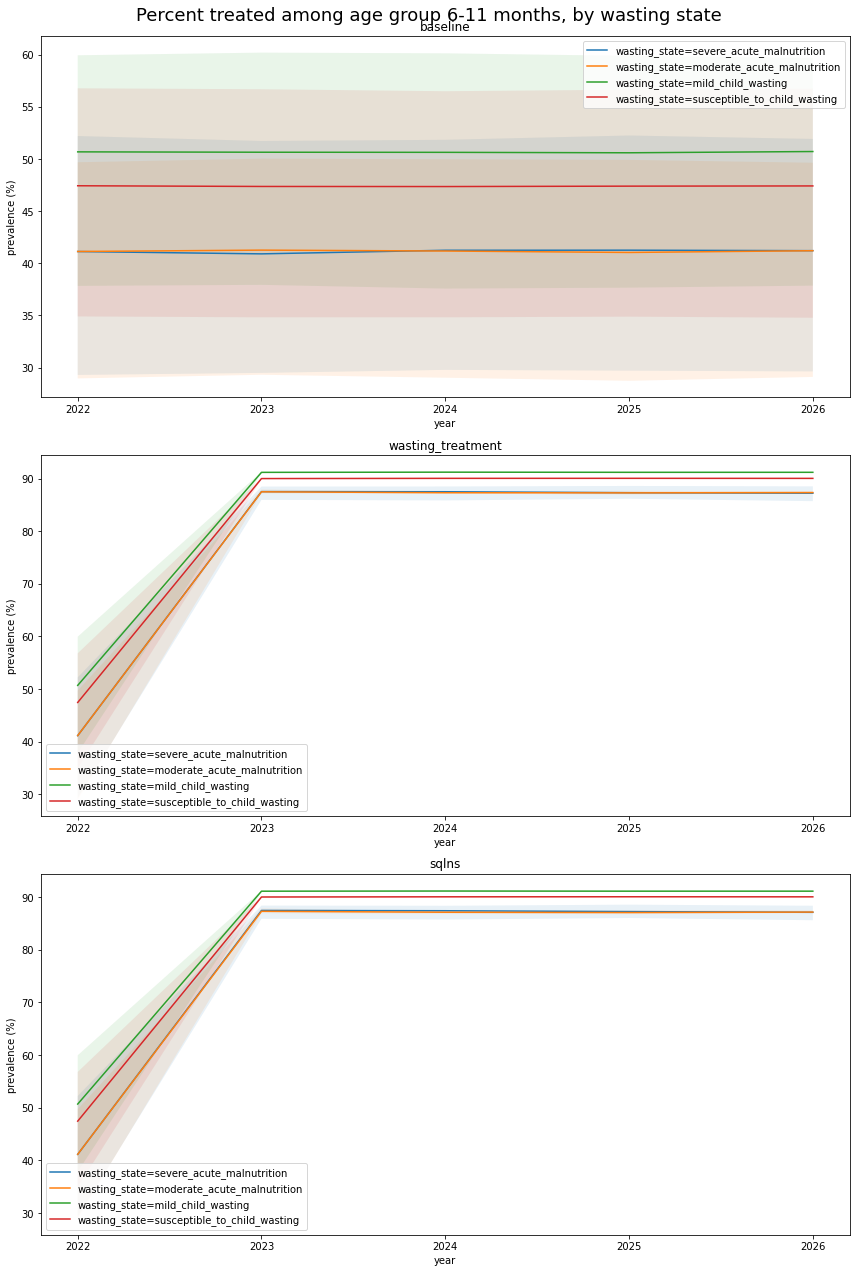

In [22]:
fig = csp.plot_over_time_by_column_for_each_scenario(
    percent_treated_by_year_age_wasting_state.query(
        "wasting_treatment=='covered' and age=='6-11_months'"),
    colname='wasting_state',
    ylabel='prevalence (%)',
    suptitle='Percent treated among age group 6-11 months, by wasting state',
    uncertainty=True
)